This notebook scans for labelled audio samples in a directory,
extracts the spectrum of the samples and creates dataset files
with the spectrum data to train the audio detection model.

In [1]:
import os

from micmon.audio import AudioDirectory, AudioPlayer, AudioFile
from micmon.dataset import DatasetWriter

basedir = os.path.expanduser(os.path.join('~', 'datasets', 'baby-monitor'))
audio_dir = os.path.join(basedir, 'audio')
datasets_dir = os.path.join(basedir, 'datasets')
audio_dirs = AudioDirectory.scan(audio_dir)
cutoff_frequencies = [250, 7500]

Play some audio samples

In [2]:
for audio_dir in audio_dirs:
    with AudioFile(audio_dir.audio_file, start='19:40', duration=5) as reader, \
            AudioPlayer() as player:
        for sample in reader:
            player.play(sample)

Plot the audio for each of the first 10 seconds of each audio file.

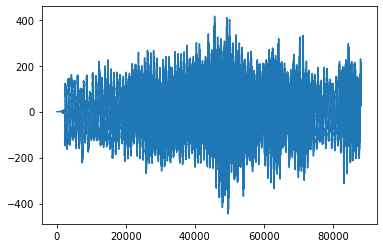

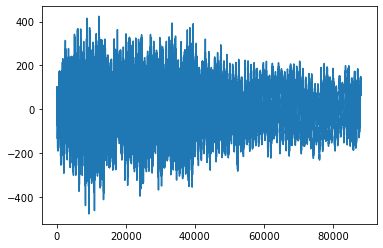

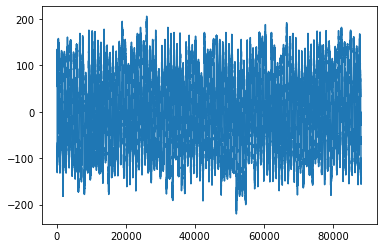

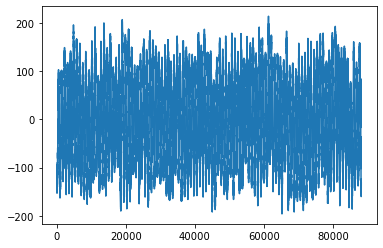

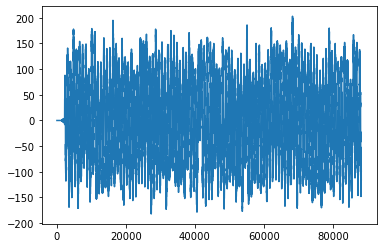

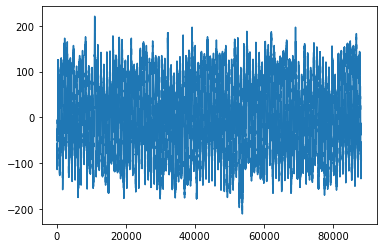

In [4]:
for audio_dir in audio_dirs:
    with AudioFile(audio_dir.audio_file, start=0, duration=4) as reader:
        for sample in reader:
            sample.plot_audio()

Plot the spectrum of the audio samples in the first 10 seconds of each audio file.

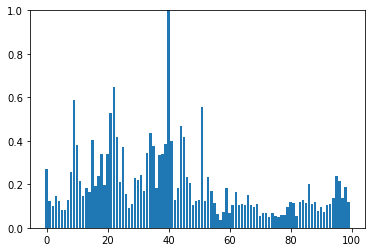

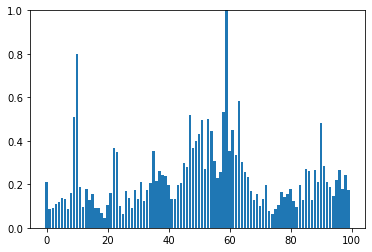

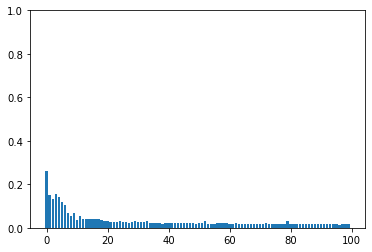

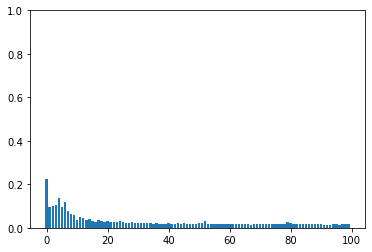

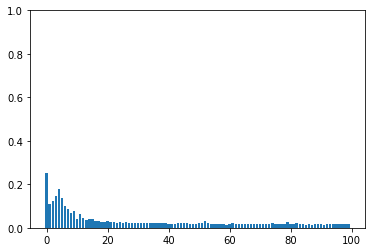

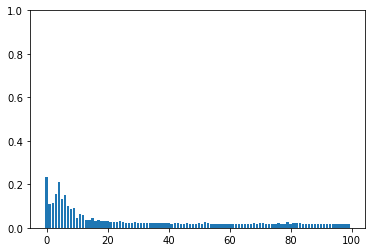

In [3]:
for audio_dir in audio_dirs:
    with AudioFile(audio_dir.audio_file, start=0, duration=4) as reader:
        for sample in reader:
            sample.plot_spectrum(low_freq=cutoff_frequencies[0],
                                 high_freq=cutoff_frequencies[1])

Save the spectrum information and labels of the samples to a
different compressed file for each audio file.

In [5]:
for audio_dir in audio_dirs:
    dataset_file = os.path.join(datasets_dir, os.path.basename(audio_dir.path) + '.npz')
    print(f'Processing audio sample {audio_dir.path}')

    with AudioFile(audio_dir.audio_file, audio_dir.labels_file) as reader, \
            DatasetWriter(dataset_file,
                          low_freq=cutoff_frequencies[0],
                          high_freq=cutoff_frequencies[1]) as writer:
        for sample in reader:
            writer += sample

Processing audio sample /home/blacklight/datasets/baby-monitor/audio/2020-10-25_16-36-00
Processing audio sample /home/blacklight/datasets/baby-monitor/audio/2020-10-24_19-53-00
Processing audio sample /home/blacklight/datasets/baby-monitor/audio/2020-10-24_17-25-00
